In [1]:
#Step 1: Import all packages needed for running the code

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np  # matematicas
import seaborn as sns  # regresiones
import calendar

In [2]:
#Step 2: Read the csv file with the data and create the dataframe. Also, define the path where the file will be saved

url = "./applemobilitytrends-2020-11-14_UnitedStates_2.csv"
df = pd.read_csv(url, header=0)
path = "./applemobilitytrends-2020-11-14_UnitedStates_3.csv"

In [3]:
#Step 3: Convert the columnd 'Date' into datetime. Order the dataset by date

df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date"])
print(df.head())


        Date  driving  transit  walking  Unnamed: 4  Number_of_Cases  \
0 2020-01-01   100.00   100.00   100.00         NaN                0   
1 2020-01-02   102.97    97.77    99.59         NaN                0   
2 2020-01-03   105.19    98.84   101.87         NaN                0   
3 2020-01-04   108.48    99.04   100.60         NaN                0   
4 2020-01-05   125.51   108.03   121.36         NaN                0   

   Mobility Average Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 12  \
0        100.000000        NaN         NaN         NaN  ...          NaN   
1        100.110000        NaN         NaN         NaN  ...          NaN   
2        101.966667        NaN         NaN         NaN  ...          NaN   
3        102.706667        NaN         NaN         NaN  ...          NaN   
4        118.300000        NaN         NaN         NaN  ...          NaN   

   Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  Unnamed: 17  \
0          NaN          NaN          NaN

<IPython.core.display.Javascript object>


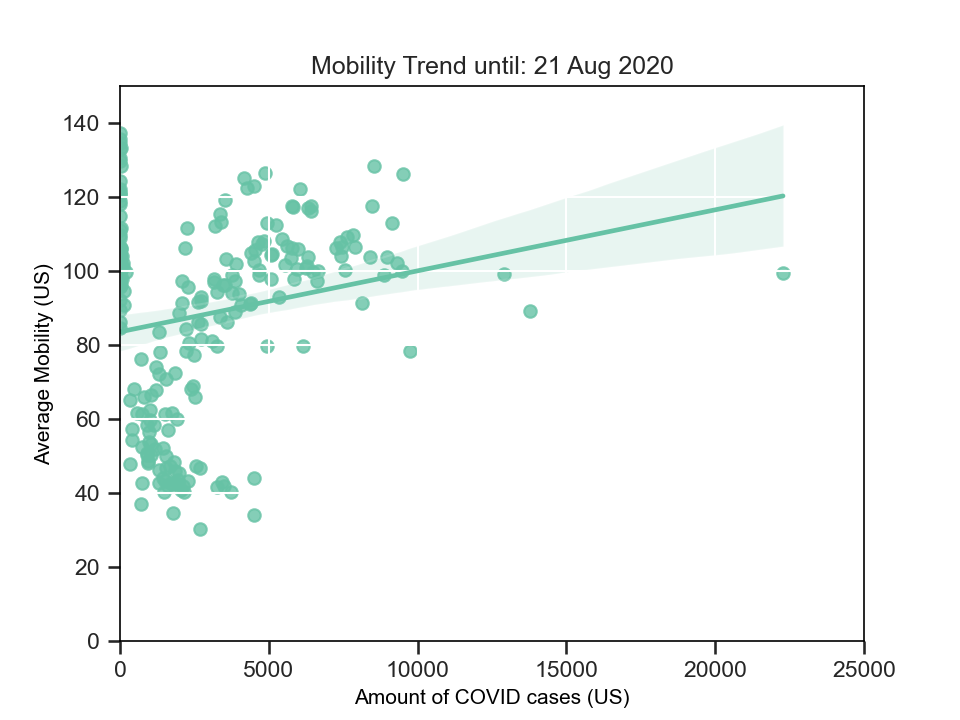

In [4]:
#Step 4: Create the plot figure
x_data = []
y_data = []

fig, ax = plt.subplots()
ax.set_xlim(0, 25000)
ax.set_ylim(0, 150)
ax.set_xlabel('Amount of COVID cases (US)')
ax.set_ylabel("Average Mobility (US)")
ax.set_title('Mobility Trend until:')

#Step 5: Create the function that animates the graphic by date, call the function and plot the graph

def animation_frame(i):
    x = df['Number_of_Cases'][i]
    y = df['Mobility Average'][i]
    x_data.append(x)
    y_data.append(y)
    plt.cla()
    plt.xlim(0, 25000)
    plt.ylim((0, 150))
    plot1 = sns.regplot(x=x_data, y=y_data)
    sns.set(palette='Set2')
    month_numb = df['Date'][i].month
    day_numb = df['Date'][i].day
    year_numb = df['Date'][i].year
    month_name = calendar.month_abbr[month_numb]
    plt.title("Mobility Trend until: " + str(day_numb) + ' ' + str(month_name) + ' ' + str(year_numb))
    plt.xlabel("Amount of COVID cases (US)")
    plt.ylabel("Average Mobility (US)")

    return plot1


animation = FuncAnimation(fig, func=animation_frame, frames=np.arange(0, 279, 1), interval=1)
plt.show()


In [5]:
#The graph shows a negative correlation between the variables when the covid starts to hit the US. Then after a while, 
#the mobility start to increase again, changing to a positive correlation between both variables